# Project 2

**Group # 1**
Adam Gersowitz, Diego Correa, Maria A Ginorio

Identify a large 2-node network dataset—you can start with a dataset in a repository.
Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

## Required Packages

In [103]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite as bp
import numpy as np
import pandas as pd


## About the Data

We will consider the yahoo finance module in python and it is a very easy module to work with.

The ticker Module, which allows access to data in pythonic way.

[Dow Jones Wiki](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)



In [2]:
import yfinance as yf

In [3]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]


In [4]:
# extract symbol from df
# add them into a list
tickers = tickers.Symbol.to_list()

In [8]:
# create a list of dfs that will be populated with the Institutional Holder df
# the institutional holder info its extracted from the symbol ticker

frames = []

for ticker in tickers:
    var = yf.Ticker(ticker)
    frame = var.institutional_holders
    frame['Comp'] = var.ticker
    frames.append(frame)

In [9]:
# create variable containing a list of all 30 companies of dow jones
all_dow = pd.concat(frames)

### Dow Jones Companies + Institutional Holders Ownership

In [10]:
all_dow

,Holder,Shares,Date Reported,% Out,Value,Comp
0,"Vanguard Group, Inc. (The)",50131410,2021-09-29,0.0866,8794051942,MMM
1,Blackrock Inc.,41630784,2021-09-29,0.0719,7302872129,MMM
2,State Street Corporation,30529390,2021-09-29,0.0528,5355465593,MMM
3,"Geode Capital Management, LLC",10652692,2021-09-29,0.0184,1868695230,MMM
4,"Charles Schwab Investment Management, Inc.",10195784,2021-09-29,0.0176,1788544429,MMM
...,...,...,...,...,...,...
5,Northern Trust Corporation,16607064,2021-12-30,0.0060,2402876090,WMT
6,Morgan Stanley,15580922,2021-12-30,0.0056,2254403604,WMT
7,Norges Bank Investment Management,15012238,2020-12-30,0.0054,2164014107,WMT
8,State Farm Mutual Automobile Insurance Co,13083050,2021-12-30,0.0047,1892986504,WMT


## Project Bipartite Graph

In order to create a relationship we have chosen to use in:
* Holder (right)
* Company (left)
* Shares (relationship)

In [11]:
# create a graph
edges = [tuple(x) for x in all_dow[['Holder', 'Comp', 'Shares']].values.tolist()]


In [53]:
B = nx.Graph()
B.add_nodes_from(all_dow['Holder'].unique(), bipartite='holder', label='holder',edge_attr=True)
B.add_nodes_from(all_dow['Comp'].unique(), bipartite='comp', label='comp', edge_attr=True)

for row in edges:
    B.add_edge(row[0], row[1], shares=row[2])

In [54]:
edge_list = nx.to_edgelist(B)

### Test Network Connectivity
In order to proceed with the bipartite analysis we run a test using Networkx functions to check for connectivity and  a bipartite graph

In [55]:
print(nx.is_connected(B))

True


In [56]:
print(nx.is_bipartite(B))

True


### Sets for Bipartite
In order to work with bipartite networks and utilize the modules in the Bipartite Module. We will need to utilize sets that are used as containers to drop them in the functions needed for analysis.

* Top_nodes = Institutional Holders that have shares of companies in the DIJA
* Bottom_nodes = Companies in the Dow Jones

In [57]:
companies, holders = bp.sets(B)

In [58]:
companies = [n for n, d in B.nodes(data=True) if d["bipartite"] == 'comp']
holders = [n for n, d in B.nodes(data=True) if d['bipartite'] == 'holder']

In [59]:
(list(companies))

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [60]:
(list(holders))

['Vanguard Group, Inc. (The)',
 'Blackrock Inc.',
 'State Street Corporation',
 'Geode Capital Management, LLC',
 'Charles Schwab Investment Management, Inc.',
 'Newport Trust Co',
 'State Farm Mutual Automobile Insurance Co',
 'Flossbach von Storch AG',
 'Northern Trust Corporation',
 'Massachusetts Financial Services Co.',
 'Berkshire Hathaway, Inc',
 'Wellington Management Group, LLP',
 'Fisher Asset Management, LLC',
 'Dodge & Cox Inc',
 'JP Morgan Chase & Company',
 'Morgan Stanley',
 'Capital Research Global Investors',
 'Primecap Management Company',
 'FMR, LLC',
 'Price (T.Rowe) Associates Inc',
 'Norges Bank Investment Management',
 'Bank Of New York Mellon Corporation',
 'Loomis Sayles & Company, LP',
 'Bank of America Corporation',
 'Capital World Investors',
 'Bill & Melinda Gates Foundation Trust',
 'Invesco Ltd.',
 'Capital International Investors',
 'Ameriprise Financial, Inc.',
 'Barclays Plc',
 'Dimensional Fund Advisors LP',
 'Wells Fargo & Company',
 'Franklin Resour

### Set Colors

In order to differentiate our bipartite network we assign different colors to the top_nodes and bottom nodes to obtain clear graph

In [63]:
color = bp.color(B)

color_dict = {'holder':'b', 'comp':'r'}

color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')]

In [64]:
pos = dict()
color = []
pos.update( (n, (1, i)) for i, n in enumerate(companies) )
pos.update( (n, (2, i)) for i, n in enumerate(holders) )


### Hello Dow Jones Graph

Bipartite graphs naturally appear in applications involving two types of objects, or objects playing different roles.

Institutional Holders = Blue
Companies = Red
In this graph the node size is based on its degree which are the number of connections (shares) each node has.

C:\Users\maria\anaconda3\envs\dt620_36\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\maria\anaconda3\envs\dt620_36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


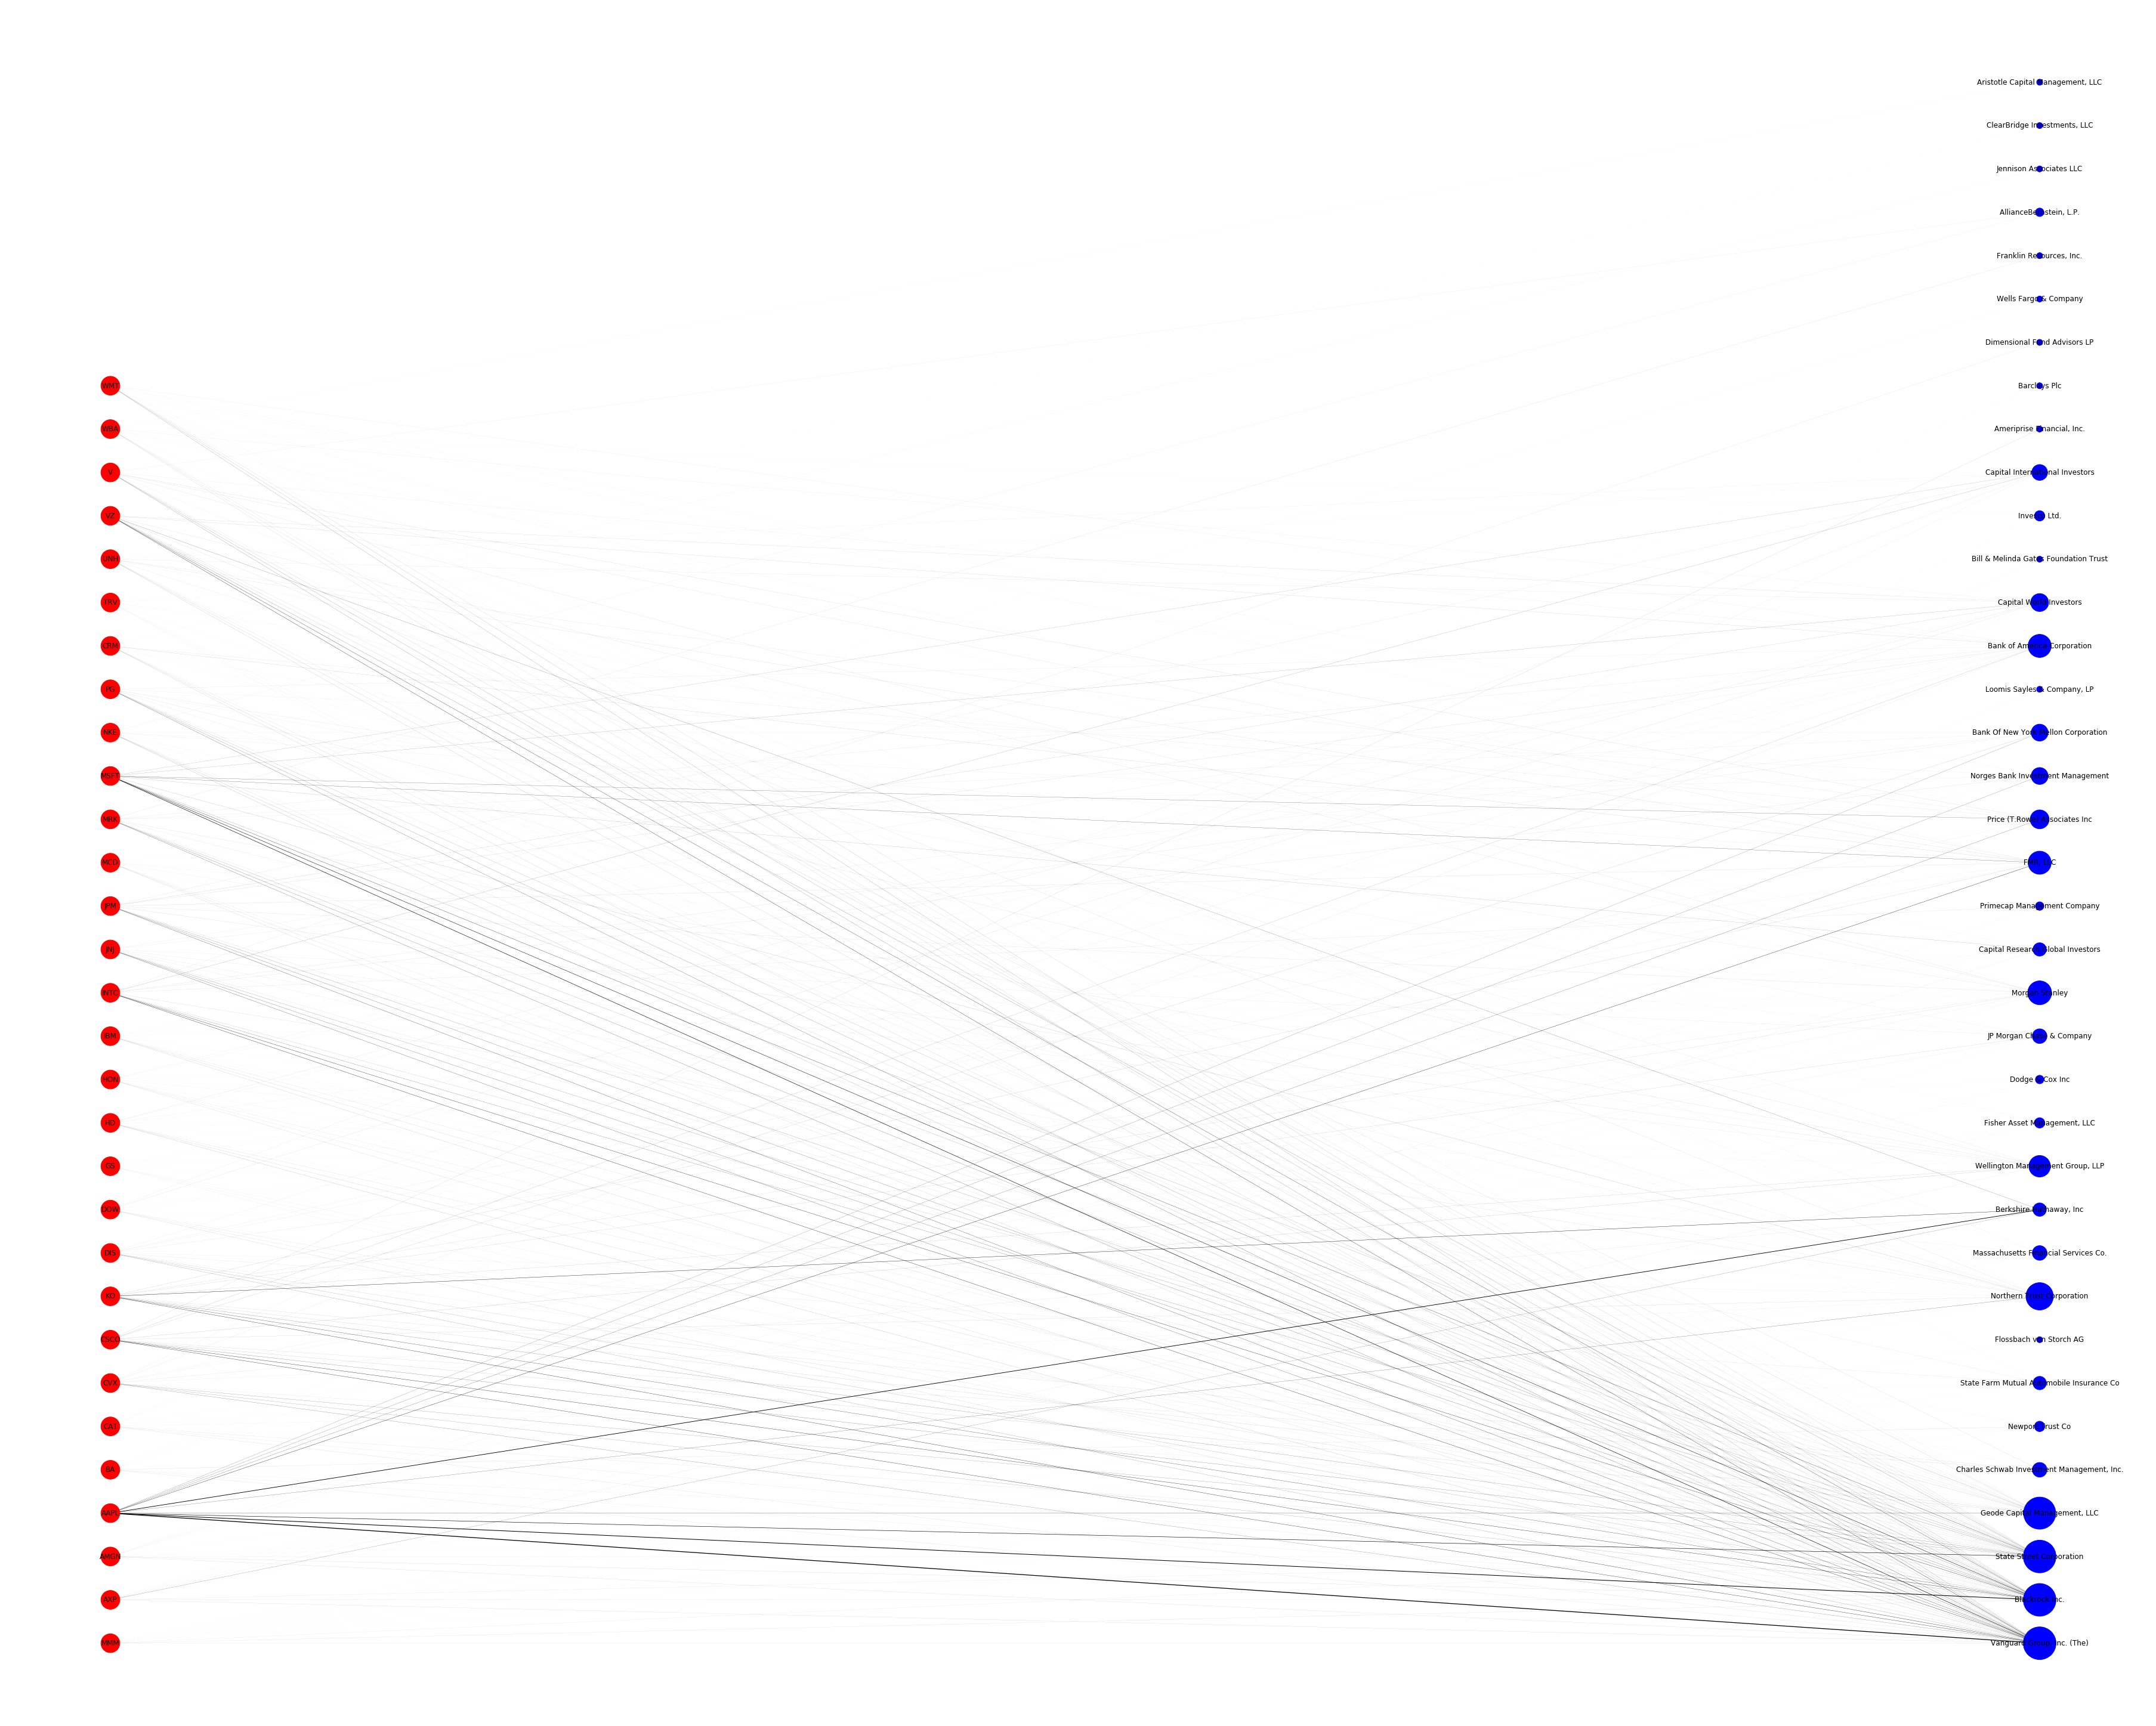

In [65]:
# hello dow jones network
plt.figure(figsize=(50,40))
nx.draw(B, pos=pos,
        with_labels=True,
        node_color = color_list,
        node_size = [v * 100 for v in dict(B.degree()).values()],
        width = [v[2]['shares']/1_000_000_000 for v in edge_list])
plt.show()

In [66]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 67
Number of edges: 300
Average degree:   8.9552


## Degree Centrality on Original Graph

### Degree Centrality Companies

The degree centrality metric is something we can calculate for bipartite graphs. Recall that the degree centrality metric is the number of neighbors of a node divided by the total number of possible neighbors.

For unipartite networks, the degree centrality values are normalized by dividing by the maximum possible degree (which is n-1 where n is the number of nodes in G).

In the bipartite case, the maximum possible degree of a node in a bipartite node set is the number of nodes in the opposite node set [1]. The degree centrality for a node v in the bipartite sets U with n nodes and V with m nodes is

In [67]:
dc_comp = bp.degree_centrality(B, companies)
dc_comp_df = pd.DataFrame.from_dict({
    'node': list(dc_comp.keys()),
    'degree': list(dc_comp.values())
})
dc_comp_df.sort_values('degree', ascending=False)

,node,degree
55,Blackrock Inc.,1.000000
60,State Street Corporation,1.000000
35,"Vanguard Group, Inc. (The)",1.000000
39,"Geode Capital Management, LLC",0.966667
59,Northern Trust Corporation,0.700000
...,...,...
36,"Franklin Resources, Inc.",0.033333
34,"Loomis Sayles & Company, LP",0.033333
31,Wells Fargo & Company,0.033333
65,Bill & Melinda Gates Foundation Trust,0.033333


### Degree Centrality Inst Holders

In [68]:
dc_holder = bp.degree_centrality(B, holders)
dc_holder_df = pd.DataFrame.from_dict({
    'node': list(dc_holder.keys()),
    'degree': list(dc_holder.values())
})
dc_holder_df.sort_values('degree', ascending=False)

,node,degree
25,Blackrock Inc.,1.000000
30,State Street Corporation,1.000000
5,"Vanguard Group, Inc. (The)",1.000000
9,"Geode Capital Management, LLC",0.966667
29,Northern Trust Corporation,0.700000
...,...,...
35,Bill & Melinda Gates Foundation Trust,0.033333
22,Jennison Associates LLC,0.033333
26,Flossbach von Storch AG,0.033333
1,Wells Fargo & Company,0.033333


### Node Partition Distributions Plot

Plot the degree centrality distribution of both node partitions from the original graph

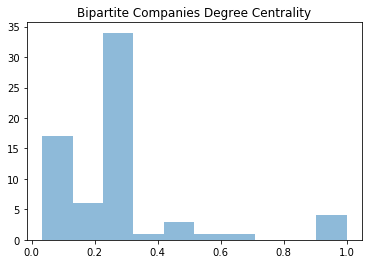

In [69]:
plt.figure()
plt.hist(dc_comp.values(), alpha=0.5)
plt.title('Bipartite Companies Degree Centrality')
plt.show()

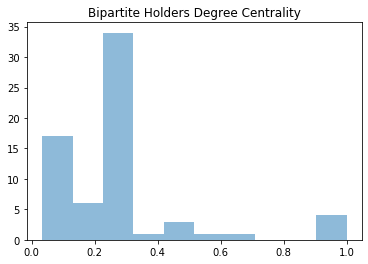

In [70]:
plt.figure()
plt.hist(dc_holder.values(), alpha=0.5)
plt.title('Bipartite Holders Degree Centrality')
plt.show()

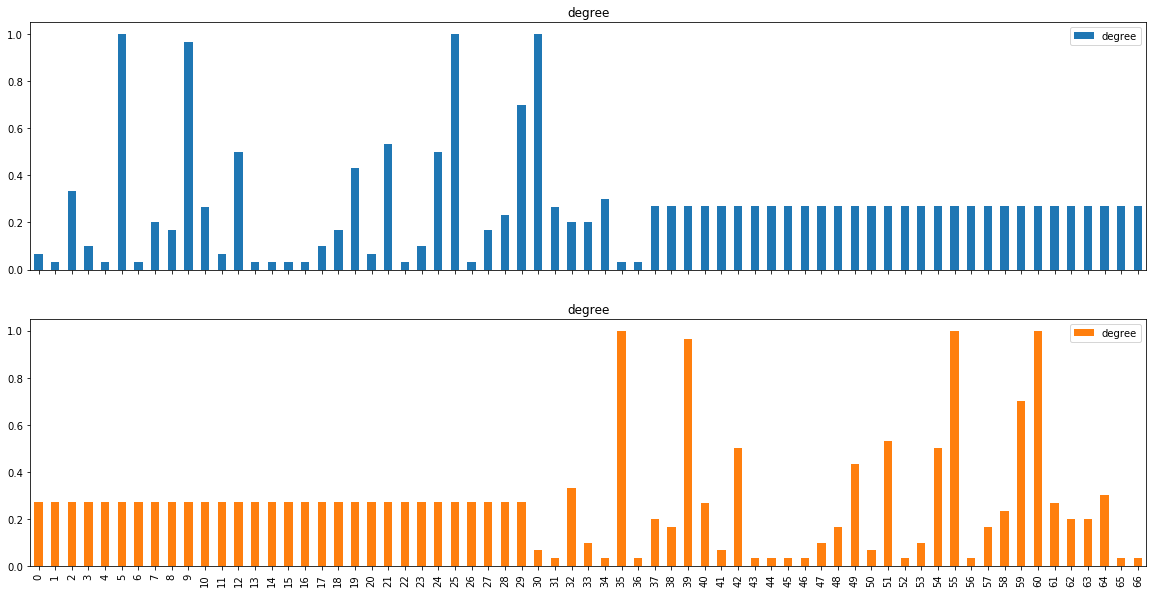

In [102]:
summary_df = pd.concat([dc_holder_df,dc_comp_df], axis=1)
viz = summary_df.plot.bar(rot=90, subplots=True, figsize=(20,10))

## Partition Graph Projections
How does one compute graph projections using NetworkX? Turns out, NetworkX has a bipartite submodule, which gives us all of the facilities that we need to interact with bipartite algorithms.

We will perform analysis only in the institutional holder partition

First of all, we need to check that the graph is indeed a bipartite graph. NetworkX provides a function for us to do so:

In [71]:
N_graph = B.copy()


In [72]:
print(bp.is_bipartite(N_graph))

True


### Projected Graphs

Now, what is the interpretation of these projected graphs?

* For comp_graph, we found the companies who are linked by sharing Institutional Holders
* For Holder_graph, we found Institutional Holders that are linked by shared share holding or investment in this companies.

In [46]:
# companies = [n for n in B.nodes() if B.nodes[n]['bipartite'] == 'comp']
# holders = [n for n, d in B.nodes(data=True) if d['bipartite'] == 'holder']

In [73]:
comp_graph = bp.projected_graph(N_graph, companies)
holder_graph = bp.projected_graph(N_graph, holders)

In [74]:
(list(comp_graph.edges(data=True))[0:5])

[('MMM', 'INTC', {}),
 ('MMM', 'KO', {}),
 ('MMM', 'AMGN', {}),
 ('MMM', 'DIS', {}),
 ('MMM', 'AXP', {})]

For Holder_graph, we found Institutional Holders that are linked by sharing shares or fragments of ownership in these companies.


In [75]:
(list(holder_graph.edges(data=True))[0:5])

[('Vanguard Group, Inc. (The)', 'Dodge & Cox Inc', {}),
 ('Vanguard Group, Inc. (The)', 'Wells Fargo & Company', {}),
 ('Vanguard Group, Inc. (The)', 'Price (T.Rowe) Associates Inc', {}),
 ('Vanguard Group, Inc. (The)', 'Invesco Ltd.', {}),
 ('Vanguard Group, Inc. (The)', 'Loomis Sayles & Company, LP', {})]

### Plot Degree Centrality on Projection

Degree Centrality Distribution of the Companies Projected Graph

We can see that the Degree Distribution is 30 for all Companies using nx.degree_centrality

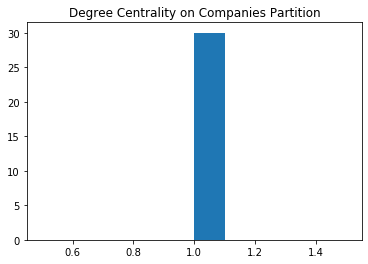

In [79]:
plt.figure()
comp_dc = nx.degree_centrality(comp_graph)
plt.hist(comp_dc.values())
plt.title('Degree Centrality on Companies Partition Projected Graph')
plt.show()

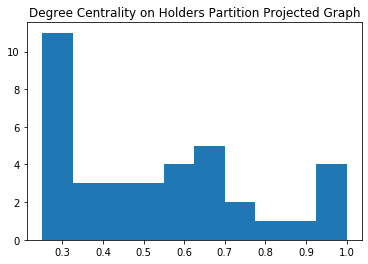

In [80]:
plt.figure()
comp_dc = nx.degree_centrality(holder_graph)
plt.hist(comp_dc.values())
plt.title('Degree Centrality on Holders Partition Projected Graph')
plt.show()

### Weighted Projection Graphs

The weighted projected graph is the projection of the bipartite network B onto the specified nodes with weights representing the number of shared neighbors or the ratio between actual shared neighbors and possible shared neighbors if ratio is True. The nodes retain their attributes and are connected in the resulting graph if they have an edge to a common node in the original graph.

Though we were able to find out which graphs were connected with one another, we did not record in the resulting projected graph the strength by which the two nodes were connected. To preserve this information, we need another function:

**The Weighted projection will help us obtain the information of the strength by which two nodes are connected**

### Weighted Projection on Companies

In [81]:
weighted_comp_graph = bp.weighted_projected_graph(N_graph, companies, ratio=False)
list(weighted_comp_graph.edges(data=True))

[('MMM', 'INTC', {'weight': 5}),
 ('MMM', 'KO', {'weight': 5}),
 ('MMM', 'HON', {'weight': 6}),
 ('MMM', 'CAT', {'weight': 6}),
 ('MMM', 'AMGN', {'weight': 6}),
 ('MMM', 'MCD', {'weight': 5}),
 ('MMM', 'AAPL', {'weight': 5}),
 ('MMM', 'DIS', {'weight': 6}),
 ('MMM', 'AXP', {'weight': 4}),
 ('MMM', 'GS', {'weight': 5}),
 ('MMM', 'DOW', {'weight': 5}),
 ('MMM', 'MSFT', {'weight': 5}),
 ('MMM', 'VZ', {'weight': 6}),
 ('MMM', 'CSCO', {'weight': 6}),
 ('MMM', 'WBA', {'weight': 5}),
 ('MMM', 'NKE', {'weight': 5}),
 ('MMM', 'MRK', {'weight': 5}),
 ('MMM', 'WMT', {'weight': 6}),
 ('MMM', 'TRV', {'weight': 5}),
 ('MMM', 'HD', {'weight': 5}),
 ('MMM', 'JPM', {'weight': 4}),
 ('MMM', 'JNJ', {'weight': 6}),
 ('MMM', 'UNH', {'weight': 4}),
 ('MMM', 'IBM', {'weight': 6}),
 ('MMM', 'V', {'weight': 5}),
 ('MMM', 'PG', {'weight': 5}),
 ('MMM', 'CVX', {'weight': 5}),
 ('MMM', 'BA', {'weight': 6}),
 ('MMM', 'CRM', {'weight': 4}),
 ('AXP', 'INTC', {'weight': 3}),
 ('AXP', 'KO', {'weight': 7}),
 ('AXP', 'H

In [82]:
weight_list = list(weighted_comp_graph.edges(data=True))
weight_df = pd.DataFrame.from_records(weight_list, columns=['comp1', 'comp2', 'weight'])


In [83]:
weights = weight_df['weight'].tolist()
w = pd.DataFrame(weights)

In [84]:
weight_df.drop('weight', axis=1, inplace=True)
weight_df = weight_df.assign(weight=w['weight'])

In [85]:
weight_df.sort_values('weight', ascending=True)

,comp1,comp2,weight
39,AXP,MSFT,3
42,AXP,WBA,3
29,AXP,INTC,3
343,INTC,CRM,4
266,GS,MCD,4
...,...,...,...
409,PG,WMT,8
198,CSCO,JNJ,8
378,MCD,PG,9
395,MSFT,UNH,9


In [86]:
print(weight_df["weight"].mean())

5.917241379310345


In [40]:
# C = weighted_comp_graph
#
# comp_weight = []
#
# def weight_rank_comp(C):
#     for weight in C:
#         comp_weight.append(dict(node = bottom_nodes, weight = weighted_comp_graph.edges[C, bottom_nodes]["weight"]))
#     return pd.DataFrame(comp_weight).sort_values("weight", ascending=False)

In [ ]:
# #\todo\**
# C = weighted_comp_graph
#
# c_list = {}
#
# for h in N_bottom:
#     c_list[h] = C.degree(h)
#
# comp_df = pd.DataFrame.from_dict(c_list, orient='index', columns=['Degree'])
#
# print(comp_df.nlargest(5, 'Degree'))

### Weighted Projection on Institutional Holders

In [89]:
weighted_holders_graph = bp.weighted_projected_graph(N_graph, holders, ratio=False)
(list(weighted_holders_graph.edges(data=True)))

[('Vanguard Group, Inc. (The)', 'Dodge & Cox Inc', {'weight': 2}),
 ('Vanguard Group, Inc. (The)', 'Wells Fargo & Company', {'weight': 1}),
 ('Vanguard Group, Inc. (The)',
  'Price (T.Rowe) Associates Inc',
  {'weight': 10}),
 ('Vanguard Group, Inc. (The)', 'Invesco Ltd.', {'weight': 3}),
 ('Vanguard Group, Inc. (The)', 'Loomis Sayles & Company, LP', {'weight': 1}),
 ('Vanguard Group, Inc. (The)', 'Franklin Resources, Inc.', {'weight': 1}),
 ('Vanguard Group, Inc. (The)',
  'Bank Of New York Mellon Corporation',
  {'weight': 8}),
 ('Vanguard Group, Inc. (The)',
  'State Farm Mutual Automobile Insurance Co',
  {'weight': 5}),
 ('Vanguard Group, Inc. (The)',
  'Geode Capital Management, LLC',
  {'weight': 29}),
 ('Vanguard Group, Inc. (The)',
  'Massachusetts Financial Services Co.',
  {'weight': 6}),
 ('Vanguard Group, Inc. (The)', 'AllianceBernstein, L.P.', {'weight': 2}),
 ('Vanguard Group, Inc. (The)', 'Bank of America Corporation', {'weight': 15}),
 ('Vanguard Group, Inc. (The)', 'B

In [90]:
weight2_list = list(weighted_holders_graph.edges(data=True))
weight2_df = pd.DataFrame.from_records(weight2_list, columns=['holder1', 'holder2', 'weight'])

In [91]:
weights2 = weight2_df['weight'].tolist()
w = pd.DataFrame(weights2)

In [92]:
weight2_df.drop('weight', axis=1, inplace=True)
weight2_df = weight2_df.assign(weight=w['weight'])

In [93]:
weight2_df.sort_values('weight', ascending=True)

,holder1,holder2,weight
176,State Farm Mutual Automobile Insurance Co,"Wellington Management Group, LLP",1
188,Northern Trust Corporation,Massachusetts Financial Services Co.,1
189,Northern Trust Corporation,"AllianceBernstein, L.P.",1
191,Northern Trust Corporation,"Aristotle Capital Management, LLC",1
192,Northern Trust Corporation,Dimensional Fund Advisors LP,1
...,...,...,...
8,"Vanguard Group, Inc. (The)","Geode Capital Management, LLC",29
44,Blackrock Inc.,"Geode Capital Management, LLC",29
24,"Vanguard Group, Inc. (The)",Blackrock Inc.,30
29,"Vanguard Group, Inc. (The)",State Street Corporation,30


In [94]:
print(weight2_df["weight"].mean())

3.8243626062322944


In [ ]:
# H = weighted_holders_graph
#
# h_list = {}
#
# for h in N_top:
#     h_list[h] = H.degree(h)
#
# holder_df = pd.DataFrame.from_dict(h_list, orient='index', columns=['Degree'])
#
# print(holder_df.nlargest(5, 'Degree'))

In [ ]:
# print(holder_df.nsmallest(5, 'Degree'))

In [ ]:
# import plotly.express as px
# fig = px.histogram(holder_df, x = 'Degree', nbins = 10)
# fig.update_layout(title = 'Histogram of Degree')
# fig.show()

## The Island Method

imagine our network as an island with a complex terrain, where the height of each point on the terrain is defined by the value of a node (e.g., degree centrality) or edge (e.g., number of shares in a company a institutional holder has )

In terms of networks, this means that the giant component gets split up into smaller components, and areas with the strongest amount of shares ownership activity (subcores) become their own components that can be analyzed separately.

### Island Method Function

In [95]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            w = edata['weight']
            g2.add_edge(f,to,weighth=w)
    return g2

### Islands in Companies Set Weight > 7

C:\Users\maria\anaconda3\envs\dt620_36\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\maria\anaconda3\envs\dt620_36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


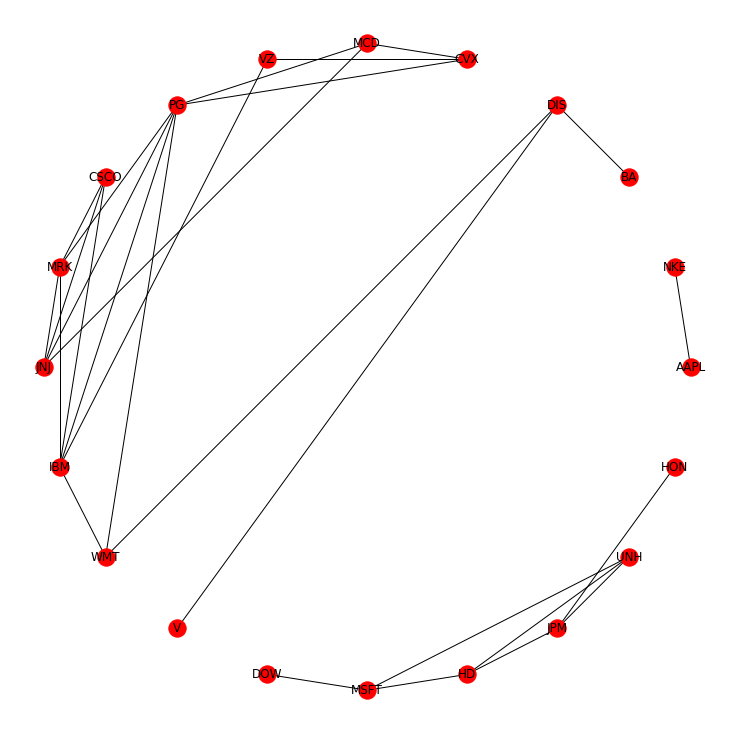

In [96]:
island_trim = trim_edges(weighted_comp_graph, weight=7)
plt.figure(figsize=(10,10))
nx.draw_circular(island_trim, node_color='r', with_labels=True)

### Islands in Holders weight > 10

C:\Users\maria\anaconda3\envs\dt620_36\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\maria\anaconda3\envs\dt620_36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


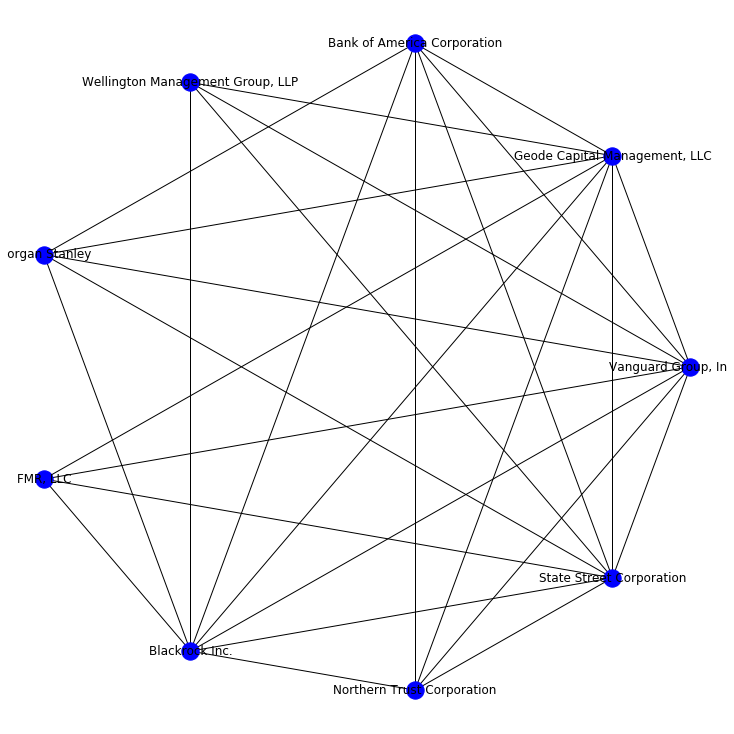

In [97]:
island_holder_trim = trim_edges(weighted_holders_graph, weight=10)
plt.figure(figsize=(10,10))
nx.draw_circular(island_holder_trim, node_color='blue', with_labels=True)

### Define the Raise of Water level

In [98]:
def island_method(g, iterations=5):
    weightss= [edata['weight'] for f,to,edata in g.edges(data=True)]

    mn=int(min(weightss))
    mx=int(max(weightss))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)

    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

### Companies

This function will return a list of graph objects, each corresponding to a specific water level.

In [100]:
island_method_comp = island_method(weighted_comp_graph, iterations=5)
(list(island_method_comp))

[[3, <networkx.classes.graph.Graph at 0x29e49326ac8>],
 [4, <networkx.classes.graph.Graph at 0x29e493266d8>],
 [5, <networkx.classes.graph.Graph at 0x29e49326518>],
 [6, <networkx.classes.graph.Graph at 0x29e49326860>],
 [7, <networkx.classes.graph.Graph at 0x29e49326be0>],
 [8, <networkx.classes.graph.Graph at 0x29e493265c0>]]

### Holders

This function will return a list of graph objects, each corresponding to a specific water level.

In [101]:
island_method_holder = island_method(weighted_holders_graph, iterations=5)
(list(island_method_holder))

[[1, <networkx.classes.graph.Graph at 0x29e493263c8>],
 [6, <networkx.classes.graph.Graph at 0x29e49326e10>],
 [11, <networkx.classes.graph.Graph at 0x29e49326668>],
 [16, <networkx.classes.graph.Graph at 0x29e49326b00>],
 [21, <networkx.classes.graph.Graph at 0x29e493269b0>],
 [26, <networkx.classes.graph.Graph at 0x29e49326a20>]]

## Conclusion

Weight is important to determine and run the Island Method. Without the weight and the Weighted Projected Graph we will not be able to determine the Island Method because the weight is important to obtain the thresholds the Island method function provides in its logic.

Some of the important "water levels" in the Holders set are 6,11,16,21. We can utilize these thresholds to draw the graph and visualize who are the holders Islands.

